# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 800
VAL_COUNT = 200
IMAGE_SIZE = 512
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


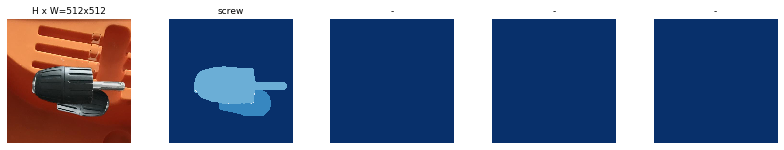

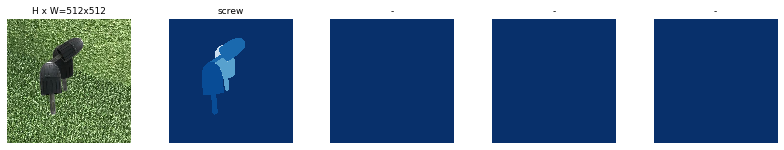

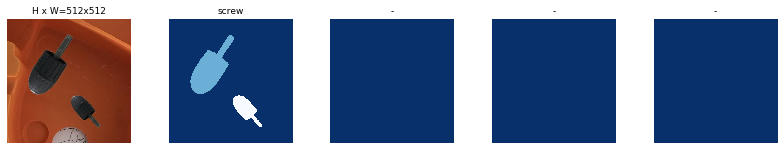

Displaying examples from validation dataset:


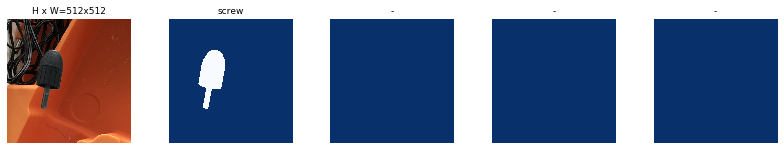

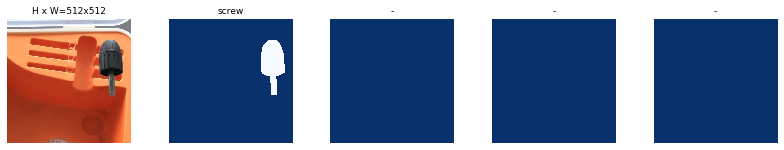

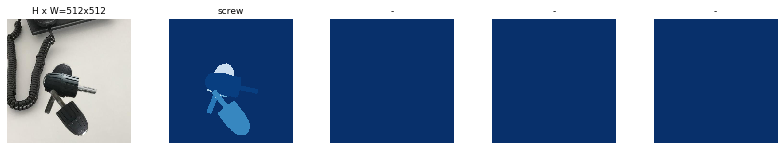

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/ikea_drill_screw/.DS_Store to s3://dkitdatasets/ikea_drill_screw/.DS_Store
upload: ../datasets/ikea_drill_screw/Small Bit1/IMG_0202.png to s3://dkitdatasets/ikea_drill_screw/Small Bit1/IMG_0202.png
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
upload: ../datasets/ikea_drill_screw/Small Bit1/IMG_0462.png to s3://dkitdatasets/ikea_drill_screw/Small Bit1/IMG_0462.png
delete: s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_1079.png
upload: ../datasets/ikea_drill_screw/Small Bit1/IMG_0467.png to s3://dkitdatasets/ikea_drill_screw/Small Bit1/IMG_0467.png
upload: ../datasets/ikea_drill_screw/Small Bit1/IMG_1078.png to s3://dkitdatasets/ikea_drill_screw/Small Bit1/IMG_1078.png
upload: ../datasets/ikea_drill_screw/Small Bit1/IMG_1079.png to s3://dkitdatasets/ikea_drill_screw/Small Bit1/IMG_1079.png
delete: s3://dkitdatasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/train/images/00000056.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000056.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000060.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000060.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000057.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000057.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000059.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000059.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000058.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000058.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000065.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000065.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000061.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000061.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000062.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000119.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000119.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000122.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000122.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000123.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000123.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000118.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000118.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000127.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000127.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000126.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000126.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000124.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000124.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000114.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000185.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000185.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000187.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000187.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000190.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000190.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000191.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000191.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000189.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000189.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000192.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000192.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000193.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000193.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000194.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000255.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000255.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000248.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000248.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000240.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000240.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000243.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000243.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000258.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000258.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000259.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000259.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000256.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000256.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000260.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000319.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000319.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000323.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000323.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000320.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000320.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000321.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000321.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000324.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000324.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000326.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000326.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000327.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000327.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000328.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000391.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000391.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000389.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000389.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000388.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000388.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000390.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000390.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000392.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000392.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000393.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000393.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000394.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000394.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000398.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000453.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000453.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000451.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000451.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000452.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000452.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000454.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000454.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000455.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000455.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000458.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000458.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000456.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000456.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000457.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000519.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000519.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000518.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000518.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000516.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000516.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000525.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000525.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000522.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000522.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000521.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000521.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000524.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000524.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000520.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000587.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000587.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000581.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000581.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000588.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000588.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000585.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000585.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000569.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000569.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000589.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000589.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000592.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000592.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000591.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000654.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000654.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000659.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000659.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000658.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000658.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000653.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000653.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000657.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000657.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000646.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000646.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000660.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000660.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000665.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000720.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000720.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000723.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000723.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000713.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000713.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000722.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000722.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000703.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000703.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000696.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000696.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000724.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000724.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000726.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000779.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000779.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000782.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000782.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000784.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000784.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000785.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000785.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000783.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000783.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000787.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000787.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000786.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000786.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000788.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000050.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000050.png
upload: ../datasets/ikea_drill_screw/train/masks/00000051.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000051.png
upload: ../datasets/ikea_drill_screw/train/masks/00000057.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000057.png
upload: ../datasets/ikea_drill_screw/train/masks/00000053.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000053.png
upload: ../datasets/ikea_drill_screw/train/masks/00000052.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000052.png
upload: ../datasets/ikea_drill_screw/train/masks/00000058.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000058.png
upload: ../datasets/ikea_drill_screw/train/masks/00000055.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000055.png
upload: ../datasets/ikea_drill_screw/train/masks/00000064.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000064.png


upload: ../datasets/ikea_drill_screw/train/masks/00000117.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000117.png
upload: ../datasets/ikea_drill_screw/train/masks/00000111.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000111.png
upload: ../datasets/ikea_drill_screw/train/masks/00000115.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000115.png
upload: ../datasets/ikea_drill_screw/train/masks/00000121.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000121.png
upload: ../datasets/ikea_drill_screw/train/masks/00000120.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000120.png
upload: ../datasets/ikea_drill_screw/train/masks/00000118.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000118.png
upload: ../datasets/ikea_drill_screw/train/masks/00000123.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000123.png
upload: ../datasets/ikea_drill_screw/train/masks/00000124.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000124.png


upload: ../datasets/ikea_drill_screw/train/masks/00000193.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000193.png
upload: ../datasets/ikea_drill_screw/train/masks/00000192.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000192.png
upload: ../datasets/ikea_drill_screw/train/masks/00000191.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000191.png
upload: ../datasets/ikea_drill_screw/train/masks/00000189.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000189.png
upload: ../datasets/ikea_drill_screw/train/masks/00000194.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000194.png
upload: ../datasets/ikea_drill_screw/train/masks/00000190.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000190.png
upload: ../datasets/ikea_drill_screw/train/masks/00000199.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000199.png
upload: ../datasets/ikea_drill_screw/train/masks/00000195.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000195.png


upload: ../datasets/ikea_drill_screw/train/masks/00000262.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000262.png
upload: ../datasets/ikea_drill_screw/train/masks/00000256.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000256.png
upload: ../datasets/ikea_drill_screw/train/masks/00000259.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000259.png
upload: ../datasets/ikea_drill_screw/train/masks/00000265.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000265.png
upload: ../datasets/ikea_drill_screw/train/masks/00000268.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000268.png
upload: ../datasets/ikea_drill_screw/train/masks/00000218.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000218.png
upload: ../datasets/ikea_drill_screw/train/masks/00000223.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000223.png
upload: ../datasets/ikea_drill_screw/train/masks/00000263.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000263.png


upload: ../datasets/ikea_drill_screw/train/masks/00000330.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000330.png
upload: ../datasets/ikea_drill_screw/train/masks/00000331.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000331.png
upload: ../datasets/ikea_drill_screw/train/masks/00000332.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000332.png
upload: ../datasets/ikea_drill_screw/train/masks/00000329.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000329.png
upload: ../datasets/ikea_drill_screw/train/masks/00000328.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000328.png
upload: ../datasets/ikea_drill_screw/train/masks/00000334.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000334.png
upload: ../datasets/ikea_drill_screw/train/masks/00000333.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000333.png
upload: ../datasets/ikea_drill_screw/train/masks/00000336.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000336.png


upload: ../datasets/ikea_drill_screw/train/masks/00000397.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000397.png
upload: ../datasets/ikea_drill_screw/train/masks/00000399.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000399.png
upload: ../datasets/ikea_drill_screw/train/masks/00000400.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000400.png
upload: ../datasets/ikea_drill_screw/train/masks/00000403.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000403.png
upload: ../datasets/ikea_drill_screw/train/masks/00000404.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000404.png
upload: ../datasets/ikea_drill_screw/train/masks/00000402.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000402.png
upload: ../datasets/ikea_drill_screw/train/masks/00000406.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000406.png
upload: ../datasets/ikea_drill_screw/train/masks/00000407.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000407.png


upload: ../datasets/ikea_drill_screw/train/masks/00000471.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000471.png
upload: ../datasets/ikea_drill_screw/train/masks/00000473.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000473.png
upload: ../datasets/ikea_drill_screw/train/masks/00000472.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000472.png
upload: ../datasets/ikea_drill_screw/train/masks/00000470.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000470.png
upload: ../datasets/ikea_drill_screw/train/masks/00000476.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000476.png
upload: ../datasets/ikea_drill_screw/train/masks/00000477.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000477.png
upload: ../datasets/ikea_drill_screw/train/masks/00000474.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000474.png
upload: ../datasets/ikea_drill_screw/train/masks/00000475.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000475.png


upload: ../datasets/ikea_drill_screw/train/masks/00000542.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000542.png
upload: ../datasets/ikea_drill_screw/train/masks/00000541.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000541.png
upload: ../datasets/ikea_drill_screw/train/masks/00000543.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000543.png
upload: ../datasets/ikea_drill_screw/train/masks/00000545.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000545.png
upload: ../datasets/ikea_drill_screw/train/masks/00000544.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000544.png
upload: ../datasets/ikea_drill_screw/train/masks/00000546.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000546.png
upload: ../datasets/ikea_drill_screw/train/masks/00000549.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000549.png
upload: ../datasets/ikea_drill_screw/train/masks/00000548.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000548.png


upload: ../datasets/ikea_drill_screw/train/masks/00000608.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000608.png
upload: ../datasets/ikea_drill_screw/train/masks/00000614.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000614.png
upload: ../datasets/ikea_drill_screw/train/masks/00000610.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000610.png
upload: ../datasets/ikea_drill_screw/train/masks/00000613.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000613.png
upload: ../datasets/ikea_drill_screw/train/masks/00000612.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000612.png
upload: ../datasets/ikea_drill_screw/train/masks/00000615.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000615.png
upload: ../datasets/ikea_drill_screw/train/masks/00000619.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000619.png
upload: ../datasets/ikea_drill_screw/train/masks/00000617.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000617.png


upload: ../datasets/ikea_drill_screw/train/masks/00000680.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000680.png
upload: ../datasets/ikea_drill_screw/train/masks/00000681.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000681.png
upload: ../datasets/ikea_drill_screw/train/masks/00000682.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000682.png
upload: ../datasets/ikea_drill_screw/train/masks/00000684.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000684.png
upload: ../datasets/ikea_drill_screw/train/masks/00000686.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000686.png
upload: ../datasets/ikea_drill_screw/train/masks/00000688.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000688.png
upload: ../datasets/ikea_drill_screw/train/masks/00000689.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000689.png
upload: ../datasets/ikea_drill_screw/train/masks/00000685.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000685.png


upload: ../datasets/ikea_drill_screw/train/masks/00000748.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000748.png
upload: ../datasets/ikea_drill_screw/train/masks/00000746.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000746.png
upload: ../datasets/ikea_drill_screw/train/masks/00000747.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000747.png
upload: ../datasets/ikea_drill_screw/train/masks/00000749.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000749.png
upload: ../datasets/ikea_drill_screw/train/masks/00000751.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000751.png
upload: ../datasets/ikea_drill_screw/train/masks/00000752.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000752.png
upload: ../datasets/ikea_drill_screw/train/masks/00000753.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000753.png
upload: ../datasets/ikea_drill_screw/train/masks/00000750.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000750.png


upload: ../datasets/ikea_drill_screw/val/images/00000009.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000009.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000018.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000018.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000014.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000014.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000020.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000020.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000016.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000016.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000021.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000021.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000019.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000019.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000015.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000015.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000085.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000085.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000087.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000087.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000088.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000088.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000090.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000090.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000091.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000091.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000089.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000089.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000092.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000092.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000094.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000094.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000158.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000158.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000160.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000160.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000165.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000165.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000157.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000157.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000156.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000156.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000162.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000162.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000163.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000163.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000159.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000159.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/masks/00000029.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000029.png
upload: ../datasets/ikea_drill_screw/val/masks/00000030.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000030.png
upload: ../datasets/ikea_drill_screw/val/masks/00000025.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000025.png
upload: ../datasets/ikea_drill_screw/val/masks/00000028.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000028.png
upload: ../datasets/ikea_drill_screw/val/masks/00000034.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000034.png
upload: ../datasets/ikea_drill_screw/val/masks/00000026.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000026.png
upload: ../datasets/ikea_drill_screw/val/masks/00000027.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000027.png
upload: ../datasets/ikea_drill_screw/val/masks/00000031.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000031.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000088.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000088.png
upload: ../datasets/ikea_drill_screw/val/masks/00000098.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000098.png
upload: ../datasets/ikea_drill_screw/val/masks/00000105.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000105.png
upload: ../datasets/ikea_drill_screw/val/masks/00000094.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000094.png
upload: ../datasets/ikea_drill_screw/val/masks/00000103.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000103.png
upload: ../datasets/ikea_drill_screw/val/masks/00000101.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000101.png
upload: ../datasets/ikea_drill_screw/val/masks/00000106.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000106.png
upload: ../datasets/ikea_drill_screw/val/masks/00000114.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000114.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000167.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000167.png
upload: ../datasets/ikea_drill_screw/val/masks/00000175.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000175.png
upload: ../datasets/ikea_drill_screw/val/masks/00000169.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000169.png
upload: ../datasets/ikea_drill_screw/val/masks/00000174.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000174.png
upload: ../datasets/ikea_drill_screw/val/masks/00000173.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000173.png
upload: ../datasets/ikea_drill_screw/val/masks/00000172.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000172.png
upload: ../datasets/ikea_drill_screw/val/masks/00000171.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000171.png
upload: ../datasets/ikea_drill_screw/val/masks/00000170.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000170.png
upload: ../datasets/ikea_drill_s

# Check if training works locally

In [7]:
# !python3 ../src/coco_trainer.py train --dataset=../datasets/ikea_drill_screw --weights=coco --layers2train=heads

# Train Model in AWS

In [8]:
!cd ../src/scripts && \
bash start-training.sh all

Starting "dkit-trainer"...
Machine "dkit-trainer" is already running.
       __|  __|_  )
       _|  (     /   Deep Learning AMI (Ubuntu) Version 22.0
      ___|\___|___|

Welcome to Ubuntu 16.04.6 LTS (GNU/Linux 4.4.0-1092-aws x86_64v)

Please use one of the following commands to start the required environment with the framework of your choice:
for MXNet(+Keras2) with Python3 (CUDA 9.0 and Intel MKL-DNN) _____________________________________ source activate mxnet_p36
for MXNet(+Keras2) with Python2 (CUDA 9.0 and Intel MKL-DNN) _____________________________________ source activate mxnet_p27
for MXNet(+Amazon Elastic Inference) with Python3 _______________________________________ source activate amazonei_mxnet_p36
for MXNet(+Amazon Elastic Inference) with Python2 _______________________________________ source activate amazonei_mxnet_p27
for TensorFlow(+Keras2) with Python3 (CUDA 10.0 and Intel MKL-DNN) ___________________________ source activate tensorflow_p36
for TensorFlow(+Keras2) wi

download: s3://dkitdatasets/ikea_drill_screw/train/coco_instances.json to datasets/ikea_drill_screw/train/coco_instances.json
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000026.jpg to datasets/ikea_drill_screw/train/images/00000026.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000027.jpg to datasets/ikea_drill_screw/train/images/00000027.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000029.jpg to datasets/ikea_drill_screw/train/images/00000029.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000030.jpg to datasets/ikea_drill_screw/train/images/00000030.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000031.jpg to datasets/ikea_drill_screw/train/images/00000031.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000032.jpg to datasets/ikea_drill_screw/train/images/00000032.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000034.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000090.jpg to datasets/ikea_drill_screw/train/images/00000090.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000091.jpg to datasets/ikea_drill_screw/train/images/00000091.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000092.jpg to datasets/ikea_drill_screw/train/images/00000092.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000093.jpg to datasets/ikea_drill_screw/train/images/00000093.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000094.jpg to datasets/ikea_drill_screw/train/images/00000094.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000096.jpg to datasets/ikea_drill_screw/train/images/00000096.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000097.jpg to datasets/ikea_drill_screw/train/images/00000097.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000098.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000157.jpg to datasets/ikea_drill_screw/train/images/00000157.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000158.jpg to datasets/ikea_drill_screw/train/images/00000158.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000159.jpg to datasets/ikea_drill_screw/train/images/00000159.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000160.jpg to datasets/ikea_drill_screw/train/images/00000160.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000161.jpg to datasets/ikea_drill_screw/train/images/00000161.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000162.jpg to datasets/ikea_drill_screw/train/images/00000162.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000163.jpg to datasets/ikea_drill_screw/train/images/00000163.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000164.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000222.jpg to datasets/ikea_drill_screw/train/images/00000222.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000223.jpg to datasets/ikea_drill_screw/train/images/00000223.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000224.jpg to datasets/ikea_drill_screw/train/images/00000224.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000225.jpg to datasets/ikea_drill_screw/train/images/00000225.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000226.jpg to datasets/ikea_drill_screw/train/images/00000226.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000227.jpg to datasets/ikea_drill_screw/train/images/00000227.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000228.jpg to datasets/ikea_drill_screw/train/images/00000228.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000230.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000288.jpg to datasets/ikea_drill_screw/train/images/00000288.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000289.jpg to datasets/ikea_drill_screw/train/images/00000289.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000290.jpg to datasets/ikea_drill_screw/train/images/00000290.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000291.jpg to datasets/ikea_drill_screw/train/images/00000291.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000292.jpg to datasets/ikea_drill_screw/train/images/00000292.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000293.jpg to datasets/ikea_drill_screw/train/images/00000293.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000294.jpg to datasets/ikea_drill_screw/train/images/00000294.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000295.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000354.jpg to datasets/ikea_drill_screw/train/images/00000354.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000355.jpg to datasets/ikea_drill_screw/train/images/00000355.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000356.jpg to datasets/ikea_drill_screw/train/images/00000356.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000357.jpg to datasets/ikea_drill_screw/train/images/00000357.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000358.jpg to datasets/ikea_drill_screw/train/images/00000358.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000359.jpg to datasets/ikea_drill_screw/train/images/00000359.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000360.jpg to datasets/ikea_drill_screw/train/images/00000360.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000361.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000420.jpg to datasets/ikea_drill_screw/train/images/00000420.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000421.jpg to datasets/ikea_drill_screw/train/images/00000421.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000422.jpg to datasets/ikea_drill_screw/train/images/00000422.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000423.jpg to datasets/ikea_drill_screw/train/images/00000423.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000424.jpg to datasets/ikea_drill_screw/train/images/00000424.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000425.jpg to datasets/ikea_drill_screw/train/images/00000425.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000426.jpg to datasets/ikea_drill_screw/train/images/00000426.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000427.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000486.jpg to datasets/ikea_drill_screw/train/images/00000486.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000487.jpg to datasets/ikea_drill_screw/train/images/00000487.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000488.jpg to datasets/ikea_drill_screw/train/images/00000488.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000489.jpg to datasets/ikea_drill_screw/train/images/00000489.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000490.jpg to datasets/ikea_drill_screw/train/images/00000490.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000491.jpg to datasets/ikea_drill_screw/train/images/00000491.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000492.jpg to datasets/ikea_drill_screw/train/images/00000492.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000493.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000553.jpg to datasets/ikea_drill_screw/train/images/00000553.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000551.jpg to datasets/ikea_drill_screw/train/images/00000551.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000554.jpg to datasets/ikea_drill_screw/train/images/00000554.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000552.jpg to datasets/ikea_drill_screw/train/images/00000552.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000555.jpg to datasets/ikea_drill_screw/train/images/00000555.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000556.jpg to datasets/ikea_drill_screw/train/images/00000556.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000557.jpg to datasets/ikea_drill_screw/train/images/00000557.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000559.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000618.jpg to datasets/ikea_drill_screw/train/images/00000618.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000619.jpg to datasets/ikea_drill_screw/train/images/00000619.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000620.jpg to datasets/ikea_drill_screw/train/images/00000620.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000621.jpg to datasets/ikea_drill_screw/train/images/00000621.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000622.jpg to datasets/ikea_drill_screw/train/images/00000622.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000623.jpg to datasets/ikea_drill_screw/train/images/00000623.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000624.jpg to datasets/ikea_drill_screw/train/images/00000624.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000626.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000687.jpg to datasets/ikea_drill_screw/train/images/00000687.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000688.jpg to datasets/ikea_drill_screw/train/images/00000688.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000689.jpg to datasets/ikea_drill_screw/train/images/00000689.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000690.jpg to datasets/ikea_drill_screw/train/images/00000690.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000691.jpg to datasets/ikea_drill_screw/train/images/00000691.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000692.jpg to datasets/ikea_drill_screw/train/images/00000692.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000693.jpg to datasets/ikea_drill_screw/train/images/00000693.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000694.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/images/00000754.jpg to datasets/ikea_drill_screw/train/images/00000754.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000756.jpg to datasets/ikea_drill_screw/train/images/00000756.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000757.jpg to datasets/ikea_drill_screw/train/images/00000757.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000758.jpg to datasets/ikea_drill_screw/train/images/00000758.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000759.jpg to datasets/ikea_drill_screw/train/images/00000759.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000723.jpg to datasets/ikea_drill_screw/train/images/00000723.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000760.jpg to datasets/ikea_drill_screw/train/images/00000760.jpg
download: s3://dkitdatasets/ikea_drill_screw/train/images/00000761.jpg to datasets/ikea_drill_screw/train/images/00000

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000019.png to datasets/ikea_drill_screw/train/masks/00000019.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000020.png to datasets/ikea_drill_screw/train/masks/00000020.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000018.png to datasets/ikea_drill_screw/train/masks/00000018.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000022.png to datasets/ikea_drill_screw/train/masks/00000022.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000023.png to datasets/ikea_drill_screw/train/masks/00000023.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000024.png to datasets/ikea_drill_screw/train/masks/00000024.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000025.png to datasets/ikea_drill_screw/train/masks/00000025.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000027.png to datasets/ikea_drill_screw/train/masks/00000027.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000072.png to datasets/ikea_drill_screw/train/masks/00000072.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000086.png to datasets/ikea_drill_screw/train/masks/00000086.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000084.png to datasets/ikea_drill_screw/train/masks/00000084.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000088.png to datasets/ikea_drill_screw/train/masks/00000088.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000089.png to datasets/ikea_drill_screw/train/masks/00000089.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000087.png to datasets/ikea_drill_screw/train/masks/00000087.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000091.png to datasets/ikea_drill_screw/train/masks/00000091.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000092.png to datasets/ikea_drill_screw/train/masks/00000092.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000149.png to datasets/ikea_drill_screw/train/masks/00000149.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000150.png to datasets/ikea_drill_screw/train/masks/00000150.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000151.png to datasets/ikea_drill_screw/train/masks/00000151.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000152.png to datasets/ikea_drill_screw/train/masks/00000152.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000153.png to datasets/ikea_drill_screw/train/masks/00000153.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000154.png to datasets/ikea_drill_screw/train/masks/00000154.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000155.png to datasets/ikea_drill_screw/train/masks/00000155.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000157.png to datasets/ikea_drill_screw/train/masks/00000157.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000217.png to datasets/ikea_drill_screw/train/masks/00000217.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000202.png to datasets/ikea_drill_screw/train/masks/00000202.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000218.png to datasets/ikea_drill_screw/train/masks/00000218.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000219.png to datasets/ikea_drill_screw/train/masks/00000219.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000220.png to datasets/ikea_drill_screw/train/masks/00000220.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000221.png to datasets/ikea_drill_screw/train/masks/00000221.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000222.png to datasets/ikea_drill_screw/train/masks/00000222.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000223.png to datasets/ikea_drill_screw/train/masks/00000223.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000282.png to datasets/ikea_drill_screw/train/masks/00000282.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000283.png to datasets/ikea_drill_screw/train/masks/00000283.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000284.png to datasets/ikea_drill_screw/train/masks/00000284.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000285.png to datasets/ikea_drill_screw/train/masks/00000285.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000286.png to datasets/ikea_drill_screw/train/masks/00000286.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000287.png to datasets/ikea_drill_screw/train/masks/00000287.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000288.png to datasets/ikea_drill_screw/train/masks/00000288.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000289.png to datasets/ikea_drill_screw/train/masks/00000289.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000349.png to datasets/ikea_drill_screw/train/masks/00000349.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000350.png to datasets/ikea_drill_screw/train/masks/00000350.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000351.png to datasets/ikea_drill_screw/train/masks/00000351.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000356.png to datasets/ikea_drill_screw/train/masks/00000356.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000353.png to datasets/ikea_drill_screw/train/masks/00000353.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000354.png to datasets/ikea_drill_screw/train/masks/00000354.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000355.png to datasets/ikea_drill_screw/train/masks/00000355.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000357.png to datasets/ikea_drill_screw/train/masks/00000357.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000416.png to datasets/ikea_drill_screw/train/masks/00000416.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000417.png to datasets/ikea_drill_screw/train/masks/00000417.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000418.png to datasets/ikea_drill_screw/train/masks/00000418.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000419.png to datasets/ikea_drill_screw/train/masks/00000419.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000420.png to datasets/ikea_drill_screw/train/masks/00000420.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000421.png to datasets/ikea_drill_screw/train/masks/00000421.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000422.png to datasets/ikea_drill_screw/train/masks/00000422.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000423.png to datasets/ikea_drill_screw/train/masks/00000423.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000485.png to datasets/ikea_drill_screw/train/masks/00000485.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000486.png to datasets/ikea_drill_screw/train/masks/00000486.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000487.png to datasets/ikea_drill_screw/train/masks/00000487.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000488.png to datasets/ikea_drill_screw/train/masks/00000488.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000489.png to datasets/ikea_drill_screw/train/masks/00000489.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000490.png to datasets/ikea_drill_screw/train/masks/00000490.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000491.png to datasets/ikea_drill_screw/train/masks/00000491.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000492.png to datasets/ikea_drill_screw/train/masks/00000492.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000555.png to datasets/ikea_drill_screw/train/masks/00000555.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000556.png to datasets/ikea_drill_screw/train/masks/00000556.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000557.png to datasets/ikea_drill_screw/train/masks/00000557.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000558.png to datasets/ikea_drill_screw/train/masks/00000558.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000559.png to datasets/ikea_drill_screw/train/masks/00000559.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000560.png to datasets/ikea_drill_screw/train/masks/00000560.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000561.png to datasets/ikea_drill_screw/train/masks/00000561.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000562.png to datasets/ikea_drill_screw/train/masks/00000562.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000621.png to datasets/ikea_drill_screw/train/masks/00000621.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000622.png to datasets/ikea_drill_screw/train/masks/00000622.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000623.png to datasets/ikea_drill_screw/train/masks/00000623.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000624.png to datasets/ikea_drill_screw/train/masks/00000624.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000625.png to datasets/ikea_drill_screw/train/masks/00000625.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000626.png to datasets/ikea_drill_screw/train/masks/00000626.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000627.png to datasets/ikea_drill_screw/train/masks/00000627.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000628.png to datasets/ikea_drill_screw/train/masks/00000628.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000687.png to datasets/ikea_drill_screw/train/masks/00000687.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000688.png to datasets/ikea_drill_screw/train/masks/00000688.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000689.png to datasets/ikea_drill_screw/train/masks/00000689.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000690.png to datasets/ikea_drill_screw/train/masks/00000690.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000691.png to datasets/ikea_drill_screw/train/masks/00000691.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000692.png to datasets/ikea_drill_screw/train/masks/00000692.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000693.png to datasets/ikea_drill_screw/train/masks/00000693.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000694.png to datasets/ikea_drill_screw/train/masks/00000694.png
download

download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000755.png to datasets/ikea_drill_screw/train/masks/00000755.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000756.png to datasets/ikea_drill_screw/train/masks/00000756.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000757.png to datasets/ikea_drill_screw/train/masks/00000757.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000758.png to datasets/ikea_drill_screw/train/masks/00000758.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000759.png to datasets/ikea_drill_screw/train/masks/00000759.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000760.png to datasets/ikea_drill_screw/train/masks/00000760.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000761.png to datasets/ikea_drill_screw/train/masks/00000761.png
download: s3://dkitdatasets/ikea_drill_screw/train/masks/00000762.png to datasets/ikea_drill_screw/train/masks/00000762.png
download

download: s3://dkitdatasets/ikea_drill_screw/val/images/00000022.jpg to datasets/ikea_drill_screw/val/images/00000022.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/coco_instances.json to datasets/ikea_drill_screw/val/coco_instances.json
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000024.jpg to datasets/ikea_drill_screw/val/images/00000024.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000025.jpg to datasets/ikea_drill_screw/val/images/00000025.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000026.jpg to datasets/ikea_drill_screw/val/images/00000026.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000027.jpg to datasets/ikea_drill_screw/val/images/00000027.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000028.jpg to datasets/ikea_drill_screw/val/images/00000028.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000029.jpg to datasets/ikea_drill_screw/val/images/00000029.jpg
download: s3://dkitdatas

download: s3://dkitdatasets/ikea_drill_screw/val/images/00000089.jpg to datasets/ikea_drill_screw/val/images/00000089.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000090.jpg to datasets/ikea_drill_screw/val/images/00000090.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000091.jpg to datasets/ikea_drill_screw/val/images/00000091.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000094.jpg to datasets/ikea_drill_screw/val/images/00000094.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000095.jpg to datasets/ikea_drill_screw/val/images/00000095.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000096.jpg to datasets/ikea_drill_screw/val/images/00000096.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000097.jpg to datasets/ikea_drill_screw/val/images/00000097.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000098.jpg to datasets/ikea_drill_screw/val/images/00000098.jpg
download: s3://dkitdatas

download: s3://dkitdatasets/ikea_drill_screw/val/images/00000156.jpg to datasets/ikea_drill_screw/val/images/00000156.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000157.jpg to datasets/ikea_drill_screw/val/images/00000157.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000158.jpg to datasets/ikea_drill_screw/val/images/00000158.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000159.jpg to datasets/ikea_drill_screw/val/images/00000159.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000160.jpg to datasets/ikea_drill_screw/val/images/00000160.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000161.jpg to datasets/ikea_drill_screw/val/images/00000161.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000162.jpg to datasets/ikea_drill_screw/val/images/00000162.jpg
download: s3://dkitdatasets/ikea_drill_screw/val/images/00000163.jpg to datasets/ikea_drill_screw/val/images/00000163.jpg
download: s3://dkitdatas

download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000023.png to datasets/ikea_drill_screw/val/masks/00000023.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000024.png to datasets/ikea_drill_screw/val/masks/00000024.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000025.png to datasets/ikea_drill_screw/val/masks/00000025.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000026.png to datasets/ikea_drill_screw/val/masks/00000026.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000027.png to datasets/ikea_drill_screw/val/masks/00000027.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000028.png to datasets/ikea_drill_screw/val/masks/00000028.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000029.png to datasets/ikea_drill_screw/val/masks/00000029.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000030.png to datasets/ikea_drill_screw/val/masks/00000030.png
download: s3://dkitdatasets/ikea_drill_s

download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000091.png to datasets/ikea_drill_screw/val/masks/00000091.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000092.png to datasets/ikea_drill_screw/val/masks/00000092.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000093.png to datasets/ikea_drill_screw/val/masks/00000093.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000094.png to datasets/ikea_drill_screw/val/masks/00000094.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000095.png to datasets/ikea_drill_screw/val/masks/00000095.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000096.png to datasets/ikea_drill_screw/val/masks/00000096.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000097.png to datasets/ikea_drill_screw/val/masks/00000097.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000098.png to datasets/ikea_drill_screw/val/masks/00000098.png
download: s3://dkitdatasets/ikea_drill_s

download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000160.png to datasets/ikea_drill_screw/val/masks/00000160.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000161.png to datasets/ikea_drill_screw/val/masks/00000161.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000162.png to datasets/ikea_drill_screw/val/masks/00000162.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000164.png to datasets/ikea_drill_screw/val/masks/00000164.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000165.png to datasets/ikea_drill_screw/val/masks/00000165.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000166.png to datasets/ikea_drill_screw/val/masks/00000166.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000167.png to datasets/ikea_drill_screw/val/masks/00000167.png
download: s3://dkitdatasets/ikea_drill_screw/val/masks/00000168.png to datasets/ikea_drill_screw/val/masks/00000168.png
download: s3://dkitdatasets/ikea_drill_s


 41/200 [=====>........................] - ETA: 2:14 - loss: 9.7991 - rpn_class_loss: 0.2111 - rpn_bbox_loss: 4.0928 - mrcnn_class_loss: 0.3584 - mrcnn_bbox_loss: 4.1007 - mrcnn_mask_loss: 1.0361


 82/200 [===========>..................] - ETA: 1:01 - loss: 8.3770 - rpn_class_loss: 0.1389 - rpn_bbox_loss: 3.5151 - mrcnn_class_loss: 0.3941 - mrcnn_bbox_loss: 3.4078 - mrcnn_mask_loss: 0.9212


124/200 [=================>............] - ETA: 31s - loss: 7.2386 - rpn_class_loss: 0.1128 - rpn_bbox_loss: 3.2060 - mrcnn_class_loss: 0.3580 - mrcnn_bbox_loss: 2.7105 - mrcnn_mask_loss: 0.8513


166/200 [=======================>......] - ETA: 12s - loss: 6.4389 - rpn_class_loss: 0.0952 - rpn_bbox_loss: 2.8492 - mrcnn_class_loss: 0.3217 - mrcnn_bbox_loss: 2.3630 - mrcnn_mask_loss: 0.8098


200/200 [==============================] - 70s 351ms/step - loss: 5.9445 - rpn_class_loss: 0.0863 - rpn_bbox_loss: 2.6064 - mrcnn_class_loss: 0.3291 - mrcnn_bbox_loss: 2.1378 - mrcnn_mask_loss: 0.7850 - val_loss: 4.0819 - val_rpn_class_loss: 0.0270 - val_rpn_bbox_loss: 1.7440 - val_mrcnn_class_loss: 0.4620 - val_mrcnn_bbox_loss: 1.2043 - val_mrcnn_mask_loss: 0.6446
Epoch 2/40

  7/200 [>.............................] - ETA: 39s - loss: 3.5215 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 1.4689 - mrcnn_class_loss: 0.4078 - mrcnn_bbox_loss: 0.9494 - mrcnn_mask_loss: 0.6623


 49/200 [======>.......................] - ETA: 29s - loss: 3.2899 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 1.4488 - mrcnn_class_loss: 0.2699 - mrcnn_bbox_loss: 0.8890 - mrcnn_mask_loss: 0.6503


 91/200 [============>.................] - ETA: 21s - loss: 3.2201 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 1.4230 - mrcnn_class_loss: 0.2536 - mrcnn_bbox_loss: 0.8660 - mrcnn_mask_loss: 0.6433


133/200 [==================>...........] - ETA: 12s - loss: 3.1127 - rpn_class_loss: 0.0368 - rpn_bbox_loss: 1.3605 - mrcnn_class_loss: 0.2425 - mrcnn_bbox_loss: 0.8358 - mrcnn_mask_loss: 0.6371


175/200 [=========================>....] - ETA: 4s - loss: 2.9941 - rpn_class_loss: 0.0363 - rpn_bbox_loss: 1.3026 - mrcnn_class_loss: 0.2273 - mrcnn_bbox_loss: 0.7955 - mrcnn_mask_loss: 0.6325


200/200 [==============================] - 40s 199ms/step - loss: 2.9386 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 1.2666 - mrcnn_class_loss: 0.2211 - mrcnn_bbox_loss: 0.7885 - mrcnn_mask_loss: 0.6280 - val_loss: 3.2081 - val_rpn_class_loss: 0.0248 - val_rpn_bbox_loss: 1.5672 - val_mrcnn_class_loss: 0.2130 - val_mrcnn_bbox_loss: 0.7849 - val_mrcnn_mask_loss: 0.6182
Epoch 3/40

 16/200 [=>............................] - ETA: 35s - loss: 3.0566 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 1.5537 - mrcnn_class_loss: 0.1585 - mrcnn_bbox_loss: 0.6988 - mrcnn_mask_loss: 0.6113


 58/200 [=======>......................] - ETA: 27s - loss: 2.9286 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 1.3799 - mrcnn_class_loss: 0.1953 - mrcnn_bbox_loss: 0.7049 - mrcnn_mask_loss: 0.6139


100/200 [==============>...............] - ETA: 19s - loss: 2.7800 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 1.2689 - mrcnn_class_loss: 0.1871 - mrcnn_bbox_loss: 0.6782 - mrcnn_mask_loss: 0.6132


142/200 [====================>.........] - ETA: 11s - loss: 2.7464 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 1.2554 - mrcnn_class_loss: 0.1877 - mrcnn_bbox_loss: 0.6689 - mrcnn_mask_loss: 0.6010


184/200 [==========================>...] - ETA: 3s - loss: 2.7279 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 1.2318 - mrcnn_class_loss: 0.1963 - mrcnn_bbox_loss: 0.6695 - mrcnn_mask_loss: 0.5970


200/200 [==============================] - 40s 199ms/step - loss: 2.7326 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 1.2428 - mrcnn_class_loss: 0.1952 - mrcnn_bbox_loss: 0.6684 - mrcnn_mask_loss: 0.5927 - val_loss: 3.0467 - val_rpn_class_loss: 0.0335 - val_rpn_bbox_loss: 1.5536 - val_mrcnn_class_loss: 0.1895 - val_mrcnn_bbox_loss: 0.7513 - val_mrcnn_mask_loss: 0.5188
Epoch 4/40

 25/200 [==>...........................] - ETA: 33s - loss: 2.6950 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 1.3176 - mrcnn_class_loss: 0.1480 - mrcnn_bbox_loss: 0.6853 - mrcnn_mask_loss: 0.5197


 67/200 [=========>....................] - ETA: 25s - loss: 2.5678 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 1.1895 - mrcnn_class_loss: 0.1802 - mrcnn_bbox_loss: 0.6343 - mrcnn_mask_loss: 0.5337


109/200 [===============>..............] - ETA: 17s - loss: 2.5005 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 1.1308 - mrcnn_class_loss: 0.1792 - mrcnn_bbox_loss: 0.6192 - mrcnn_mask_loss: 0.5391


151/200 [=====================>........] - ETA: 9s - loss: 2.6018 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 1.2151 - mrcnn_class_loss: 0.1883 - mrcnn_bbox_loss: 0.6307 - mrcnn_mask_loss: 0.5373


193/200 [===========================>..] - ETA: 1s - loss: 2.5191 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 1.1592 - mrcnn_class_loss: 0.1822 - mrcnn_bbox_loss: 0.6177 - mrcnn_mask_loss: 0.5317


200/200 [==============================] - 40s 199ms/step - loss: 2.5205 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 1.1631 - mrcnn_class_loss: 0.1830 - mrcnn_bbox_loss: 0.6161 - mrcnn_mask_loss: 0.5300 - val_loss: 2.6909 - val_rpn_class_loss: 0.0221 - val_rpn_bbox_loss: 1.4012 - val_mrcnn_class_loss: 0.1181 - val_mrcnn_bbox_loss: 0.6129 - val_mrcnn_mask_loss: 0.5366
Epoch 5/40

 34/200 [====>.........................] - ETA: 31s - loss: 2.3888 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 1.1711 - mrcnn_class_loss: 0.1397 - mrcnn_bbox_loss: 0.5549 - mrcnn_mask_loss: 0.4945


 76/200 [==========>...................] - ETA: 24s - loss: 2.4044 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 1.1306 - mrcnn_class_loss: 0.1488 - mrcnn_bbox_loss: 0.5869 - mrcnn_mask_loss: 0.5096


118/200 [================>.............] - ETA: 15s - loss: 2.4069 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 1.1003 - mrcnn_class_loss: 0.1715 - mrcnn_bbox_loss: 0.5871 - mrcnn_mask_loss: 0.5221


160/200 [=======================>......] - ETA: 7s - loss: 2.3368 - rpn_class_loss: 0.0241 - rpn_bbox_loss: 1.0572 - mrcnn_class_loss: 0.1673 - mrcnn_bbox_loss: 0.5722 - mrcnn_mask_loss: 0.5159


200/200 [==============================] - 40s 201ms/step - loss: 2.3050 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 1.0508 - mrcnn_class_loss: 0.1597 - mrcnn_bbox_loss: 0.5530 - mrcnn_mask_loss: 0.5180 - val_loss: 3.9587 - val_rpn_class_loss: 0.0355 - val_rpn_bbox_loss: 2.1081 - val_mrcnn_class_loss: 0.1602 - val_mrcnn_bbox_loss: 0.9038 - val_mrcnn_mask_loss: 0.7511
Epoch 6/40

  1/200 [..............................] - ETA: 35s - loss: 2.1054 - rpn_class_loss: 0.0687 - rpn_bbox_loss: 0.9621 - mrcnn_class_loss: 0.1392 - mrcnn_bbox_loss: 0.4444 - mrcnn_mask_loss: 0.4910


 43/200 [=====>........................] - ETA: 30s - loss: 2.1406 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.9243 - mrcnn_class_loss: 0.1759 - mrcnn_bbox_loss: 0.5114 - mrcnn_mask_loss: 0.4996


 85/200 [===========>..................] - ETA: 22s - loss: 2.1788 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.9941 - mrcnn_class_loss: 0.1672 - mrcnn_bbox_loss: 0.5049 - mrcnn_mask_loss: 0.4874


127/200 [==================>...........] - ETA: 14s - loss: 2.2402 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 1.0307 - mrcnn_class_loss: 0.1680 - mrcnn_bbox_loss: 0.5162 - mrcnn_mask_loss: 0.4966


169/200 [========================>.....] - ETA: 6s - loss: 2.3380 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 1.0898 - mrcnn_class_loss: 0.1845 - mrcnn_bbox_loss: 0.5306 - mrcnn_mask_loss: 0.5026


200/200 [==============================] - 40s 201ms/step - loss: 2.3434 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 1.0884 - mrcnn_class_loss: 0.1842 - mrcnn_bbox_loss: 0.5365 - mrcnn_mask_loss: 0.5052 - val_loss: 2.8561 - val_rpn_class_loss: 0.0195 - val_rpn_bbox_loss: 1.4019 - val_mrcnn_class_loss: 0.1936 - val_mrcnn_bbox_loss: 0.6696 - val_mrcnn_mask_loss: 0.5715
Epoch 7/40

 10/200 [>.............................] - ETA: 37s - loss: 2.4584 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 1.0474 - mrcnn_class_loss: 0.2589 - mrcnn_bbox_loss: 0.5811 - mrcnn_mask_loss: 0.5452


 52/200 [======>.......................] - ETA: 28s - loss: 2.0752 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.8676 - mrcnn_class_loss: 0.1791 - mrcnn_bbox_loss: 0.5338 - mrcnn_mask_loss: 0.4714


 94/200 [=============>................] - ETA: 20s - loss: 2.2171 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.9794 - mrcnn_class_loss: 0.1664 - mrcnn_bbox_loss: 0.5478 - mrcnn_mask_loss: 0.4940


136/200 [===================>..........] - ETA: 12s - loss: 2.1911 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.9725 - mrcnn_class_loss: 0.1576 - mrcnn_bbox_loss: 0.5346 - mrcnn_mask_loss: 0.4991


178/200 [=========================>....] - ETA: 4s - loss: 2.1425 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.9383 - mrcnn_class_loss: 0.1481 - mrcnn_bbox_loss: 0.5277 - mrcnn_mask_loss: 0.5030


200/200 [==============================] - 40s 201ms/step - loss: 2.1554 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.9603 - mrcnn_class_loss: 0.1464 - mrcnn_bbox_loss: 0.5231 - mrcnn_mask_loss: 0.5001 - val_loss: 2.4114 - val_rpn_class_loss: 0.0225 - val_rpn_bbox_loss: 1.2169 - val_mrcnn_class_loss: 0.1099 - val_mrcnn_bbox_loss: 0.5501 - val_mrcnn_mask_loss: 0.5119
Epoch 8/40

 19/200 [=>............................] - ETA: 35s - loss: 2.2837 - rpn_class_loss: 0.0459 - rpn_bbox_loss: 1.0673 - mrcnn_class_loss: 0.1702 - mrcnn_bbox_loss: 0.5087 - mrcnn_mask_loss: 0.4916


 61/200 [========>.....................] - ETA: 27s - loss: 2.0574 - rpn_class_loss: 0.0414 - rpn_bbox_loss: 0.8910 - mrcnn_class_loss: 0.1595 - mrcnn_bbox_loss: 0.4773 - mrcnn_mask_loss: 0.4881


103/200 [==============>...............] - ETA: 18s - loss: 1.9937 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.8418 - mrcnn_class_loss: 0.1543 - mrcnn_bbox_loss: 0.4808 - mrcnn_mask_loss: 0.4828


145/200 [====================>.........] - ETA: 10s - loss: 2.0377 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.8763 - mrcnn_class_loss: 0.1646 - mrcnn_bbox_loss: 0.4806 - mrcnn_mask_loss: 0.4815


187/200 [===========================>..] - ETA: 2s - loss: 2.0913 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.8941 - mrcnn_class_loss: 0.1772 - mrcnn_bbox_loss: 0.4903 - mrcnn_mask_loss: 0.4961


200/200 [==============================] - 40s 201ms/step - loss: 2.0917 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.8936 - mrcnn_class_loss: 0.1769 - mrcnn_bbox_loss: 0.4899 - mrcnn_mask_loss: 0.4974 - val_loss: 2.7595 - val_rpn_class_loss: 0.0399 - val_rpn_bbox_loss: 1.4133 - val_mrcnn_class_loss: 0.1622 - val_mrcnn_bbox_loss: 0.5691 - val_mrcnn_mask_loss: 0.5749
Epoch 9/40

 28/200 [===>..........................] - ETA: 33s - loss: 1.6733 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.6610 - mrcnn_class_loss: 0.1332 - mrcnn_bbox_loss: 0.4263 - mrcnn_mask_loss: 0.4297


 70/200 [=========>....................] - ETA: 25s - loss: 1.7405 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.6952 - mrcnn_class_loss: 0.1450 - mrcnn_bbox_loss: 0.4474 - mrcnn_mask_loss: 0.4275


112/200 [===============>..............] - ETA: 17s - loss: 1.8250 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.7630 - mrcnn_class_loss: 0.1461 - mrcnn_bbox_loss: 0.4450 - mrcnn_mask_loss: 0.4427


154/200 [======================>.......] - ETA: 9s - loss: 1.8655 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.7890 - mrcnn_class_loss: 0.1486 - mrcnn_bbox_loss: 0.4488 - mrcnn_mask_loss: 0.4509


196/200 [============================>.] - ETA: 0s - loss: 1.8779 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.7780 - mrcnn_class_loss: 0.1552 - mrcnn_bbox_loss: 0.4625 - mrcnn_mask_loss: 0.4545


200/200 [==============================] - 40s 202ms/step - loss: 1.8830 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.7819 - mrcnn_class_loss: 0.1554 - mrcnn_bbox_loss: 0.4637 - mrcnn_mask_loss: 0.4543 - val_loss: 1.9035 - val_rpn_class_loss: 0.0248 - val_rpn_bbox_loss: 0.9655 - val_mrcnn_class_loss: 0.0793 - val_mrcnn_bbox_loss: 0.4713 - val_mrcnn_mask_loss: 0.3627
Epoch 10/40

 37/200 [====>.........................] - ETA: 31s - loss: 1.7983 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.7030 - mrcnn_class_loss: 0.1775 - mrcnn_bbox_loss: 0.4489 - mrcnn_mask_loss: 0.4413


 79/200 [==========>...................] - ETA: 23s - loss: 1.8484 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.7177 - mrcnn_class_loss: 0.1758 - mrcnn_bbox_loss: 0.4702 - mrcnn_mask_loss: 0.4576


121/200 [=================>............] - ETA: 15s - loss: 1.8964 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.8142 - mrcnn_class_loss: 0.1602 - mrcnn_bbox_loss: 0.4522 - mrcnn_mask_loss: 0.4439


163/200 [=======================>......] - ETA: 7s - loss: 1.8783 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.8045 - mrcnn_class_loss: 0.1546 - mrcnn_bbox_loss: 0.4493 - mrcnn_mask_loss: 0.4439


200/200 [==============================] - 40s 201ms/step - loss: 1.8306 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.7700 - mrcnn_class_loss: 0.1527 - mrcnn_bbox_loss: 0.4425 - mrcnn_mask_loss: 0.4395 - val_loss: 2.0716 - val_rpn_class_loss: 0.0191 - val_rpn_bbox_loss: 0.9868 - val_mrcnn_class_loss: 0.1700 - val_mrcnn_bbox_loss: 0.5024 - val_mrcnn_mask_loss: 0.3933
Epoch 11/40

  4/200 [..............................] - ETA: 37s - loss: 1.8898 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.8720 - mrcnn_class_loss: 0.1926 - mrcnn_bbox_loss: 0.4338 - mrcnn_mask_loss: 0.3648


 46/200 [=====>........................] - ETA: 29s - loss: 1.9930 - rpn_class_loss: 0.0225 - rpn_bbox_loss: 1.0104 - mrcnn_class_loss: 0.1458 - mrcnn_bbox_loss: 0.4212 - mrcnn_mask_loss: 0.3931


 88/200 [============>.................] - ETA: 21s - loss: 1.9143 - rpn_class_loss: 0.0225 - rpn_bbox_loss: 0.8869 - mrcnn_class_loss: 0.1361 - mrcnn_bbox_loss: 0.4427 - mrcnn_mask_loss: 0.4261


130/200 [==================>...........] - ETA: 13s - loss: 1.9381 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.8616 - mrcnn_class_loss: 0.1489 - mrcnn_bbox_loss: 0.4583 - mrcnn_mask_loss: 0.4434


172/200 [========================>.....] - ETA: 5s - loss: 1.9130 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.8424 - mrcnn_class_loss: 0.1409 - mrcnn_bbox_loss: 0.4560 - mrcnn_mask_loss: 0.4468


200/200 [==============================] - 40s 201ms/step - loss: 1.8815 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.8139 - mrcnn_class_loss: 0.1395 - mrcnn_bbox_loss: 0.4559 - mrcnn_mask_loss: 0.4465 - val_loss: 2.3858 - val_rpn_class_loss: 0.0372 - val_rpn_bbox_loss: 1.2806 - val_mrcnn_class_loss: 0.1609 - val_mrcnn_bbox_loss: 0.4799 - val_mrcnn_mask_loss: 0.4271
Epoch 12/40

 13/200 [>.............................] - ETA: 36s - loss: 2.0919 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.9525 - mrcnn_class_loss: 0.1239 - mrcnn_bbox_loss: 0.5221 - mrcnn_mask_loss: 0.4721


 55/200 [=======>......................] - ETA: 28s - loss: 1.9289 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.8619 - mrcnn_class_loss: 0.1189 - mrcnn_bbox_loss: 0.4738 - mrcnn_mask_loss: 0.4476


 97/200 [=============>................] - ETA: 19s - loss: 1.9297 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.8407 - mrcnn_class_loss: 0.1395 - mrcnn_bbox_loss: 0.4665 - mrcnn_mask_loss: 0.4557


139/200 [===================>..........] - ETA: 11s - loss: 1.9889 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.8822 - mrcnn_class_loss: 0.1389 - mrcnn_bbox_loss: 0.4728 - mrcnn_mask_loss: 0.4695


181/200 [==========================>...] - ETA: 3s - loss: 1.9171 - rpn_class_loss: 0.0239 - rpn_bbox_loss: 0.8507 - mrcnn_class_loss: 0.1392 - mrcnn_bbox_loss: 0.4574 - mrcnn_mask_loss: 0.4459


200/200 [==============================] - 40s 201ms/step - loss: 1.8776 - rpn_class_loss: 0.0238 - rpn_bbox_loss: 0.8384 - mrcnn_class_loss: 0.1321 - mrcnn_bbox_loss: 0.4485 - mrcnn_mask_loss: 0.4348 - val_loss: 2.0114 - val_rpn_class_loss: 0.0371 - val_rpn_bbox_loss: 0.9475 - val_mrcnn_class_loss: 0.1402 - val_mrcnn_bbox_loss: 0.4595 - val_mrcnn_mask_loss: 0.4272
Epoch 13/40

 22/200 [==>...........................] - ETA: 33s - loss: 1.9046 - rpn_class_loss: 0.0391 - rpn_bbox_loss: 0.8726 - mrcnn_class_loss: 0.1579 - mrcnn_bbox_loss: 0.4101 - mrcnn_mask_loss: 0.4249


 64/200 [========>.....................] - ETA: 25s - loss: 1.7583 - rpn_class_loss: 0.0361 - rpn_bbox_loss: 0.7483 - mrcnn_class_loss: 0.1431 - mrcnn_bbox_loss: 0.4012 - mrcnn_mask_loss: 0.4295


106/200 [==============>...............] - ETA: 18s - loss: 1.8034 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.7750 - mrcnn_class_loss: 0.1431 - mrcnn_bbox_loss: 0.4164 - mrcnn_mask_loss: 0.4382


148/200 [=====================>........] - ETA: 9s - loss: 1.7897 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.7730 - mrcnn_class_loss: 0.1401 - mrcnn_bbox_loss: 0.4167 - mrcnn_mask_loss: 0.4312 


190/200 [===========================>..] - ETA: 1s - loss: 1.7524 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.7449 - mrcnn_class_loss: 0.1340 - mrcnn_bbox_loss: 0.4190 - mrcnn_mask_loss: 0.4279


200/200 [==============================] - 40s 200ms/step - loss: 1.7572 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.7455 - mrcnn_class_loss: 0.1375 - mrcnn_bbox_loss: 0.4183 - mrcnn_mask_loss: 0.4291 - val_loss: 1.8033 - val_rpn_class_loss: 0.0186 - val_rpn_bbox_loss: 0.7895 - val_mrcnn_class_loss: 0.1610 - val_mrcnn_bbox_loss: 0.4591 - val_mrcnn_mask_loss: 0.3750
Epoch 14/40

 31/200 [===>..........................] - ETA: 32s - loss: 1.8556 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.8291 - mrcnn_class_loss: 0.1756 - mrcnn_bbox_loss: 0.3899 - mrcnn_mask_loss: 0.4329


 73/200 [=========>....................] - ETA: 24s - loss: 1.7228 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.7411 - mrcnn_class_loss: 0.1413 - mrcnn_bbox_loss: 0.3945 - mrcnn_mask_loss: 0.4191


115/200 [================>.............] - ETA: 16s - loss: 1.8447 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.8294 - mrcnn_class_loss: 0.1370 - mrcnn_bbox_loss: 0.4183 - mrcnn_mask_loss: 0.4318


157/200 [======================>.......] - ETA: 8s - loss: 1.8597 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.8324 - mrcnn_class_loss: 0.1471 - mrcnn_bbox_loss: 0.4252 - mrcnn_mask_loss: 0.4284


200/200 [==============================] - 40s 200ms/step - loss: 1.8534 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.8257 - mrcnn_class_loss: 0.1467 - mrcnn_bbox_loss: 0.4253 - mrcnn_mask_loss: 0.4303 - val_loss: 2.2072 - val_rpn_class_loss: 0.0221 - val_rpn_bbox_loss: 1.0178 - val_mrcnn_class_loss: 0.1713 - val_mrcnn_bbox_loss: 0.5495 - val_mrcnn_mask_loss: 0.4465


Epoch 15/40

 41/200 [=====>........................] - ETA: 31s - loss: 2.2003 - rpn_class_loss: 0.0225 - rpn_bbox_loss: 1.1362 - mrcnn_class_loss: 0.1529 - mrcnn_bbox_loss: 0.4661 - mrcnn_mask_loss: 0.4227


 83/200 [===========>..................] - ETA: 22s - loss: 1.9434 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.8902 - mrcnn_class_loss: 0.1595 - mrcnn_bbox_loss: 0.4441 - mrcnn_mask_loss: 0.4264


125/200 [=================>............] - ETA: 14s - loss: 1.9901 - rpn_class_loss: 0.0219 - rpn_bbox_loss: 0.9331 - mrcnn_class_loss: 0.1547 - mrcnn_bbox_loss: 0.4519 - mrcnn_mask_loss: 0.4284


167/200 [========================>.....] - ETA: 6s - loss: 1.9691 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.9066 - mrcnn_class_loss: 0.1531 - mrcnn_bbox_loss: 0.4510 - mrcnn_mask_loss: 0.4367


200/200 [==============================] - 40s 199ms/step - loss: 1.9711 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.9219 - mrcnn_class_loss: 0.1451 - mrcnn_bbox_loss: 0.4481 - mrcnn_mask_loss: 0.4340 - val_loss: 2.5272 - val_rpn_class_loss: 0.0196 - val_rpn_bbox_loss: 1.2411 - val_mrcnn_class_loss: 0.1358 - val_mrcnn_bbox_loss: 0.5964 - val_mrcnn_mask_loss: 0.5343
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/network.py", line 1121, in save_weights
    saving.save_weights_to_hdf5_group(f, self.layers)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py", line 588, in save_weights_to_hdf5_group
    param_dset[:] = val
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/_hl/dataset.py"

-bash: line 2:  4358 Segmentation fault      (core dumped) python3 coco_trainer.py train --dataset=../datasets/ikea_drill_screw --weights=coco --layers2train=all
upload: ../logs/cocosynth_dataset20190918T0751/mask_rcnn_cocosynth_dataset_0030.h5 to s3://dkitmodels-sg/cocosynth/mask_rcnn_dkit_cocosynth_latest.h5
Stopping "dkit-trainer"...
Machine "dkit-trainer" was stopped.
download: s3://dkitmodels-sg/mask_rcnn_cocosynth_dataset_0120.h5 to ../models/mask_rcnn_cocosynth_dataset_0120.h5
